## Isolation Forest Anomaly Detection

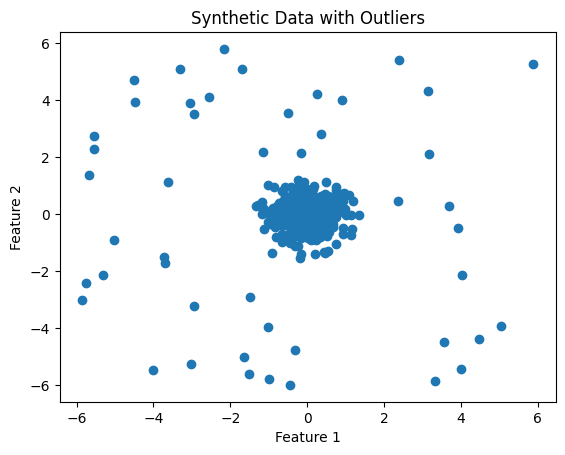

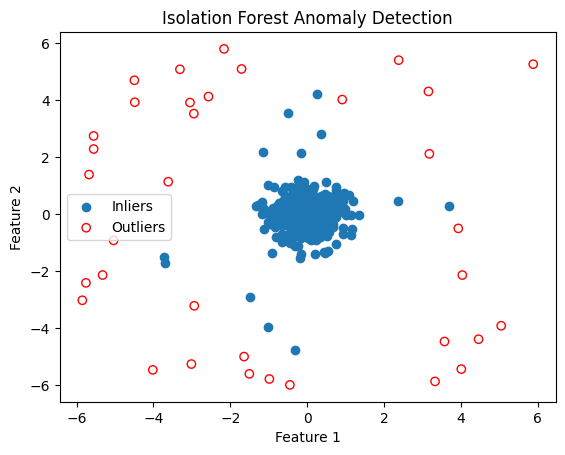

In [12]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest

# Generate a synthetic dataset with outliers
X, _ = make_blobs(n_samples=300, centers=[[0, 0], [0, 0]], cluster_std=0.5, random_state=0)
X = np.concatenate([X, np.random.uniform(low=-6, high=6, size=(50, 2))], axis=0)

# Visualize the generated data
plt.scatter(X[:, 0], X[:, 1])
plt.title("Synthetic Data with Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Apply Isolation Forest for anomaly detection
clf = IsolationForest(contamination=0.1, random_state=0) # Set contamination based on the expected proportion of outliers
clf.fit(X)
predictions = clf.predict(X)

# Separate inliers and outliers
inlier_mask = predictions == 1
outlier_mask = predictions == -1

# Visualize the results
plt.scatter(X[inlier_mask, 0], X[inlier_mask, 1], label="Inliers")
plt.scatter(X[outlier_mask, 0], X[outlier_mask, 1], edgecolors="r", facecolors="none", label="Outliers")
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()